# Diamonds

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV

%matplotlib inline

In [2]:
df = pd.read_csv('diamonds.csv', index_col='Unnamed: 0')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
con_features = ['carat','x','y','z','depth','table']
X = df.loc[:, con_features]
y = df.loc[:, 'price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)

In [6]:
df.corr()*100

,carat,depth,table,price,x,y,z
carat,100.000000,2.822431,18.161755,92.159130,97.509423,95.172220,95.338738
depth,2.822431,100.000000,-29.577852,-1.064740,-2.528925,-2.934067,9.492388
table,18.161755,-29.577852,100.000000,12.713390,19.534428,18.376015,15.092869
price,92.159130,-1.064740,12.713390,100.000000,88.443516,86.542090,86.124944
x,97.509423,-2.528925,19.534428,88.443516,100.000000,97.470148,97.077180
y,95.172220,-2.934067,18.376015,86.542090,97.470148,100.000000,95.200572
z,95.338738,9.492388,15.092869,86.124944,97.077180,95.200572,100.000000


In [7]:
# cut_lst = list(X_train.cut.unique())
# cut_dict = {typ : X_train.loc[X_train['cut'] == typ] for typ in cut_lst}    

In [8]:
# cut_dict['Premium'].head()

In [9]:
#set up the model comparison dataframe
evaluation = pd.DataFrame({'Model': [],
                           'Power': [],
                           'Features':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})




For the simple bad linear reg model we used carat as it had the highest pearson coeff

In [10]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [11]:
lr = linear_model.LinearRegression()

lr.fit(X_train['carat'].values.reshape(-1,1), y_train)


pred = lr.predict(X_test['carat'].values.reshape(-1,1))

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))
rtrsm = float(format(lr.score(X_train['carat'].values.reshape(-1,1), y_train),'.3f'))
rtesm = float(format(lr.score(X_test['carat'].values.reshape(-1,1), y_test),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=1)
cv = float(format(cross_val_score(lr,X_train[['carat']],y_train,cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression', 1,'carats', rmsesm, rtrsm,'-', rtesm,'-', cv]
evaluation

Average Price for Test Data: 3906.04
Intercept: -2261.91
Coefficient: [7768.91049036]


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,1549.641,0.849,-,0.849,-,0.849


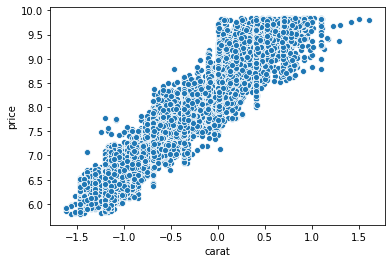

In [12]:
sns.scatterplot(x = np.log(X_train.carat), y = np.log(y_train))

In [13]:

complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(X_train, y_train)

coefficients = complex_model_1.coef_
coeff = dict(zip(con_features, coefficients))

pred = complex_model_1.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(complex_model_1.score(X_train, y_train),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(con_features)),'.3f'))
rtesm = float(format(complex_model_1.score(X_test, y_test),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(con_features)),'.3f'))

crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(complex_model_1, X_train, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(complex_model_1.intercept_))
print('Coefficient: {}'.format(complex_model_1.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Linear Regression', 1, 'all', rmsesm, artrcm, rtrsm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 3906.04
Intercept: 20976.56
Coefficient: [10683.18425966 -1286.79957429    37.63252069    53.39486424
  -204.09955335  -104.26736872]


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,1549.641,0.849,-,0.849,-,0.849
1,Multivariate Linear Regression,1.0,all,1497.391,0.859,0.849,0.859,0.859,0.859


In [14]:
def mean_norm(col):
    mean = col.mean()
    mx = np.max(col)
    mn = np.min(col)
    norm = (col - mean)/(mx - mn)
    return norm

In [15]:
for col in con_features:
    X_train[col] = mean_norm(X_train[col])

/Users/flatiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
for col in con_features:
    X_test[col] = mean_norm(X_test[col]);

/Users/flatiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
y_train, y_test = np.log(y_train), np.log(y_test)

In [18]:
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(X_train, y_train)

coefficients = complex_model_1.coef_
coeff = dict(zip(con_features, coefficients))

pred = complex_model_1.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(con_features)),'.3f'))
rtrcm = float(format(complex_model_1.score(X_train, y_train),'.3f'))

rtesm = float(format(complex_model_1.score(X_test, y_test),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(con_features)),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(complex_model_1, X_train, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(complex_model_1.intercept_))
print('Coefficient: {}'.format(coeff))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Linear Regression', 1,'all (standardised)', rmsesm, rtrsm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 7.78
Intercept: 7.79
Coefficient: {'carat': -3.257813732827368, 'x': 11.584227038789532, 'y': 2.2892337520098716, 'z': 1.747940733992007, 'depth': 0.8196322210801412, 'table': -0.5341759165032971}


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,1549.641,0.849,-,0.849,-,0.849
1,Multivariate Linear Regression,1.0,all,1497.391,0.859,0.849,0.859,0.859,0.859
2,Multivariate Linear Regression,1.0,all (standardised),0.443,0.849,0.923,0.810,0.809,0.920


In [19]:
poly = PolynomialFeatures(2)
X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.transform(X_test)

In [20]:
poly_model_2 = linear_model.LinearRegression()
poly_model_2.fit(X_train_2, y_train)

coefficients = poly_model_2.coef_
coeff = dict(zip(con_features, coefficients))

pred = poly_model_2.predict(X_test_2)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(poly_model_2.score(X_train_2, y_train),'.3f'))
artrcm = float(format(adjustedR2(poly_model_2.score(X_train_2, y_train),X_train_2.shape[0],X_train_2.shape[1]),'.3f'))
rtesm = float(format(poly_model_2.score(X_test_2, y_test),'.3f'))
artecm = float(format(adjustedR2(poly_model_2.score(X_test_2, y_test),X_test_2.shape[0],X_test_2.shape[1]),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(poly_model_2, X_train_2, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(poly_model_2.intercept_))
# print('Coefficient: {}'.format(coeff))
for coef in coefficients:
    if coef != 0:
        print(coef)

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Polynomial Regression', 2,'all (standardised)', rmsesm, rtrsm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 7.78
Intercept: 7.97
1.5259748098248296e-12
5.59159503213182
2.824298734648613
21.132074604360962
-6.431274124202963
-0.07995434630587336
-0.6269760902118515
3.870539818450863
-14.632853632657408
92.40504150785772
-135.3021906843749
-0.7775166072189813
6.240860582347194
-13.398618844794601
-104.72307834035996
48.77933914900356
-0.005491123750822376
3.207547664287904
-151.36888166449256
843.3858545522319
1.858908071100465
-72.5176907466716
12.166259567167309
-19.828035202943926
15.183879027876136
-4.395090884088778
4.994518516305255
0.2934183524205442


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,1549.641,0.849,-,0.849,-,0.849
1,Multivariate Linear Regression,1.0,all,1497.391,0.859,0.849,0.859,0.859,0.859
2,Multivariate Linear Regression,1.0,all (standardised),0.443,0.849,0.923,0.810,0.809,0.920
3,Multivariate Polynomial Regression,2.0,all (standardised),11.253,0.849,0.94,-121.762,-122.07,0.317


In [21]:
poly = PolynomialFeatures(3)
X_train_3 = poly.fit_transform(X_train)
X_test_3 = poly.transform(X_test)

In [22]:
poly_model_3 = linear_model.LinearRegression()
poly_model_3.fit(X_train_3, y_train)

coefficients = poly_model_3.coef_
coeff = dict(zip(con_features, coefficients))

pred = poly_model_3.predict(X_test_3)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(poly_model_3.score(X_train_3, y_train),'.3f'))
artrcm = float(format(adjustedR2(poly_model_3.score(X_train_3, y_train),X_train_3.shape[0], X_train_3.shape[1]),'.3f'))
rtesm = float(format(poly_model_3.score(X_test_3, y_test),'.3f'))
artecm = float(format(adjustedR2(poly_model_3.score(X_test_3, y_test),X_test_3.shape[0],X_test_3.shape[1]),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(poly_model_3, X_train_3, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(poly_model_3.intercept_))
# print('Coefficient: {}'.format(coeff))
for coef in coefficients:
    if coef != 0:
        print(coef)

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Polynomial Regression', 3,'all (standardised)', rmsesm, rtrsm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 7.78
Intercept: 7.96
1.022999172251493e-07
4.643846934009113
-1.1064221408407615
34.00920028332222
5.688542947029573
0.20939353900960622
-0.07744834250556765
-3.8466016457648067
79.87612355642023
2.3843878394526623
-482.63055018245376
62.46221155741465
31.974053628373092
-161.13396946204705
232.6091640115842
416.1338908456649
-46.62113745394677
-25.902328418006384
1426.1022831176085
-342.12887884345747
152.3440044420326
206.2574672904508
127.58245937096862
-144.9111106225314
-188.55002821256463
-4.236912620357273
12.23388869573904
-3.760865598600173
0.08577534396531128
-1131.7284841082017
4468.796101297548
1651.0517801854146
-185.62503075314132
40.77035693688599
703.0694403797401
-4485.5777941179695
3733.299184164296
757.2344243942401
-444.32529440183924
15465.783914610198
-33666.54794053437
-1738.487953157208
3269.965497202445
2025.234970156173
-732.179986399445
-904.733803291354
83.47330388494525
41.38120229950201
4.4969592316318305
792.1303804946547
-320

,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,1549.641,0.849,-,0.849,-,0.849
1,Multivariate Linear Regression,1.0,all,1497.391,0.859,0.849,0.859,0.859,0.859
2,Multivariate Linear Regression,1.0,all (standardised),0.443,0.849,0.923,0.810,0.809,0.920
3,Multivariate Polynomial Regression,2.0,all (standardised),11.253,0.849,0.94,-121.762,-122.07,0.317
4,Multivariate Polynomial Regression,3.0,all (standardised),40.289,0.849,0.943,-1572.722,-1584.92,-271.762


In [23]:
lasso_1 = LassoCV(max_iter = 100000, cv = 5)
lasso_1.fit(X_train, y_train)

coefficients = lasso_1.coef_
coeff = dict(zip(con_features, coefficients))

pred = lasso_1.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(lasso_1.score(X_train, y_train),'.3f'))
artrcm = float(format(adjustedR2(lasso_1.score(X_train, y_train), X_train.shape[0], X_train.shape[1]),'.3f'))
rtesm = float(format(lasso_1.score(X_test, y_test),'.3f'))
artecm = float(format(adjustedR2(lasso_1.score(X_test, y_test),X_test.shape[0],X_test.shape[1]),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(lasso_1, X_train, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(lasso_1.intercept_))
print('Coefficient: {}'.format(coeff))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Lasso Regression', 1,'all (standardised) alpha = {}'.format(lasso_1.alpha_), rmsesm, rtrsm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 7.78
Intercept: 7.79
Coefficient: {'carat': -2.7707583194513545, 'x': 11.899507385410715, 'y': 0.0, 'z': 0.0, 'depth': 0.8083854719755623, 'table': -0.508538058221804}


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,1549.641,0.849,-,0.849,-,0.849
1,Multivariate Linear Regression,1.0,all,1497.391,0.859,0.849,0.859,0.859,0.859
2,Multivariate Linear Regression,1.0,all (standardised),0.443,0.849,0.923,0.810,0.809,0.920
3,Multivariate Polynomial Regression,2.0,all (standardised),11.253,0.849,0.94,-121.762,-122.07,0.317
4,Multivariate Polynomial Regression,3.0,all (standardised),40.289,0.849,0.943,-1572.722,-1584.92,-271.762
5,Multivariate Lasso Regression,1.0,all (standardised) alpha = 0.00010131381848078038,0.274,0.849,0.923,0.927,0.927,0.922


In [24]:
lasso_2 = LassoCV(max_iter = 100000, cv = 5)
lasso_2.fit(X_train_2, y_train)

coefficients = lasso_2.coef_
coeff = dict(zip(con_features, coefficients))

pred = lasso_2.predict(X_test_2)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(lasso_2.score(X_train_2, y_train),'.3f'))
artrcm = float(format(adjustedR2(lasso_2.score(X_train_2, y_train), X_train_2.shape[0], X_train_2.shape[1]),'.3f'))
rtesm = float(format(lasso_2.score(X_test_2, y_test),'.3f'))
artecm = float(format(adjustedR2(lasso_2.score(X_test_2, y_test),X_test_2.shape[0],X_test_2.shape[1]),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(lasso_2, X_train_2, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(lasso_2.intercept_))
# print('Coefficient: {}'.format(coeff))
for coef in coefficients:
    if coef != 0:
        print(coef)

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Lasso Regression', 2,'all (standardised) alpha = {}'.format(lasso_2.alpha_), rmsesm, rtrsm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 7.78
Intercept: 7.97
6.600187717391651
4.370824399295123
-0.3792154691259336
-0.7485445012027535
-0.3237203459474897
-17.844068904230028
-2.4697903497226776


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,1549.641,0.849,-,0.849,-,0.849
1,Multivariate Linear Regression,1.0,all,1497.391,0.859,0.849,0.859,0.859,0.859
2,Multivariate Linear Regression,1.0,all (standardised),0.443,0.849,0.923,0.810,0.809,0.920
3,Multivariate Polynomial Regression,2.0,all (standardised),11.253,0.849,0.94,-121.762,-122.07,0.317
4,Multivariate Polynomial Regression,3.0,all (standardised),40.289,0.849,0.943,-1572.722,-1584.92,-271.762
5,Multivariate Lasso Regression,1.0,all (standardised) alpha = 0.00010131381848078038,0.274,0.849,0.923,0.927,0.927,0.922
6,Multivariate Lasso Regression,2.0,all (standardised) alpha = 0.00010131381848078038,0.302,0.849,0.938,0.911,0.911,0.938


In [50]:
itr = [x/1000 for x in list(range(0, 1000))]

In [51]:
ridge_1 = RidgeCV(alphas = itr, cv = 5)
ridge_1.fit(X_train, y_train)

coefficients = ridge_1.coef_
coeff = dict(zip(con_features, coefficients))

pred = ridge_1.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(ridge_1.score(X_train, y_train),'.3f'))
artrcm = float(format(adjustedR2(ridge_1.score(X_train, y_train), X_train.shape[0], X_train.shape[1]),'.3f'))
rtesm = float(format(ridge_1.score(X_test, y_test),'.3f'))
artecm = float(format(adjustedR2(ridge_1.score(X_test, y_test),X_test.shape[0],X_test.shape[1]),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(ridge_1, X_train, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(ridge_1.intercept_))
print('Coefficient: {}'.format(coeff))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Ridge Regression', 1,'all (standardised) alpha = {}'.format(ridge_1.alpha_), rmsesm, rtrsm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 7.78
Intercept: 7.79
Coefficient: {'carat': -2.7414906355852193, 'x': 11.073036475092117, 'y': 2.1027326292739845, 'z': 1.9938391946498935, 'depth': 0.7250591258126106, 'table': -0.5299616643982671}


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,1549.641,0.849,-,0.849,-,0.849
1,Multivariate Linear Regression,1.0,all,1497.391,0.859,0.849,0.859,0.859,0.859
2,Multivariate Linear Regression,1.0,all (standardised),0.443,0.849,0.923,0.810,0.809,0.920
3,Multivariate Polynomial Regression,2.0,all (standardised),11.253,0.849,0.94,-121.762,-122.07,0.317
4,Multivariate Polynomial Regression,3.0,all (standardised),40.289,0.849,0.943,-1572.722,-1584.92,-271.762
5,Multivariate Lasso Regression,1.0,all (standardised) alpha = 0.00010131381848078038,0.274,0.849,0.923,0.927,0.927,0.922
6,Multivariate Lasso Regression,2.0,all (standardised) alpha = 0.00010131381848078038,0.302,0.849,0.938,0.911,0.911,0.938
7,Multivariate Ridge Regression,1.0,all (standardised) alpha = 0,0.443,0.849,0.923,0.810,0.809,0.920
8,Multivariate Ridge Regression,1.0,all (standardised) alpha = 0,0.443,0.849,0.923,0.810,0.809,0.920
9,Multivariate Ridge Regression,1.0,all (standardised) alpha = 0.8,0.454,0.849,0.923,0.801,0.8,0.921


Ridge works best with alpha =0.772